In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotting_utils import binToDf, extract_data, scatter_plot
sns.set_theme(font_scale=2)
import pyarma as pa

In [27]:
files40 = [f'../output/40_close/L=40_{i}.bin' for i in range(0, 32)]
files60 = [f'../output/60_close/L=60_{i}.bin' for i in range(0, 32)]
files80 = [f'../output/80_close/L=80_{i}.bin' for i in range(0, 32)]
files100 = [f'../output/100_close/L=100_{i}.bin' for i in range(0, 32)]

data40 = extract_data(files40)
data60 = extract_data(files60)
data80 = extract_data(files80)
data100 = extract_data(files100)
data = [data40, data60, data80, data100]#, data80, data100]

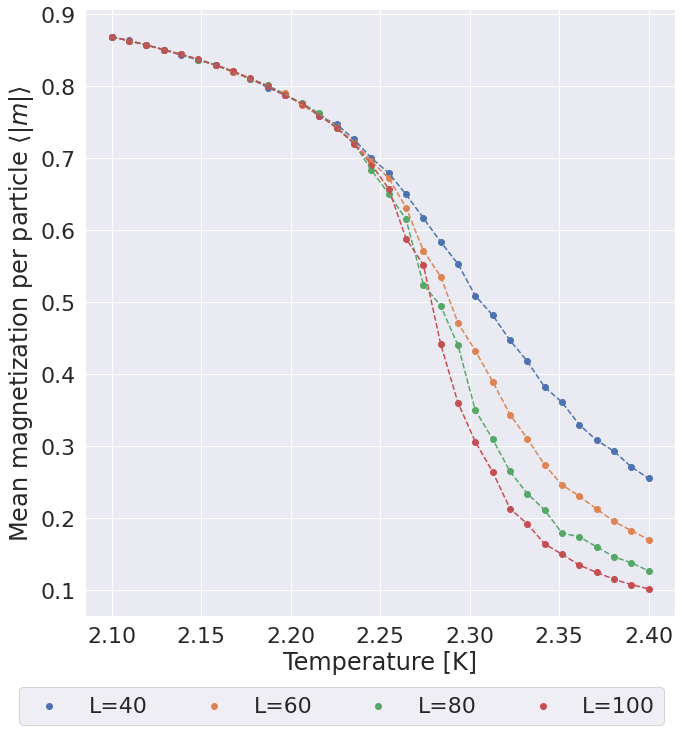

In [39]:
mags = [d['M'] for d in datafar]
temps = [d['T'] for d in datafar]
labels = [f"L={int(d.L[0])}" for d in datafar]
xlabel = r'Temperature [K]'
ylabel = r'Mean magnetization per particle $\langle|m|\rangle$'
scatter_plot(temps, mags, xlabel, ylabel, labels, savefig=True, filename='phase_mag.pdf')

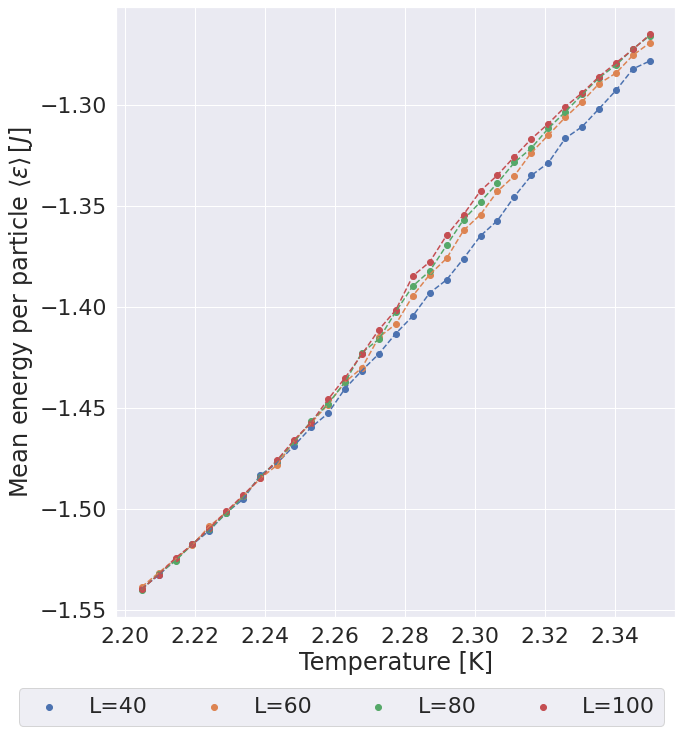

In [43]:
engs = [d['E'] for d in data]
temps = [d['T'] for d in data]
labels = [f"L={int(d.L[0])}" for d in data]
xlabel = r'Temperature [K]'
ylabel = r'Mean energy per particle $\langle\epsilon\rangle\, [J]$'
scatter_plot(temps, engs, xlabel, ylabel, labels, savefig=True, filename='phase_eng.pdf')

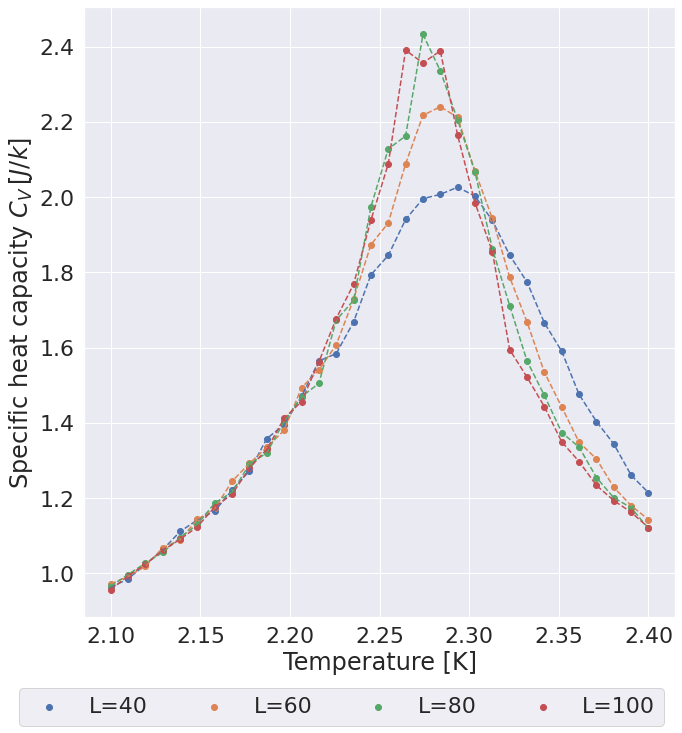

In [42]:
heatcap = [d['C'] for d in datafar]
temps = [d['T'] for d in datafar]
labels = [f"L={int(d.L[0])}" for d in datafar]
xlabel = r'Temperature [K]'
ylabel = r'Specific heat capacity $C_V\, [J/k]$'
scatter_plot(temps, heatcap, xlabel, ylabel, labels, savefig=True, filename='phase_cv.pdf')

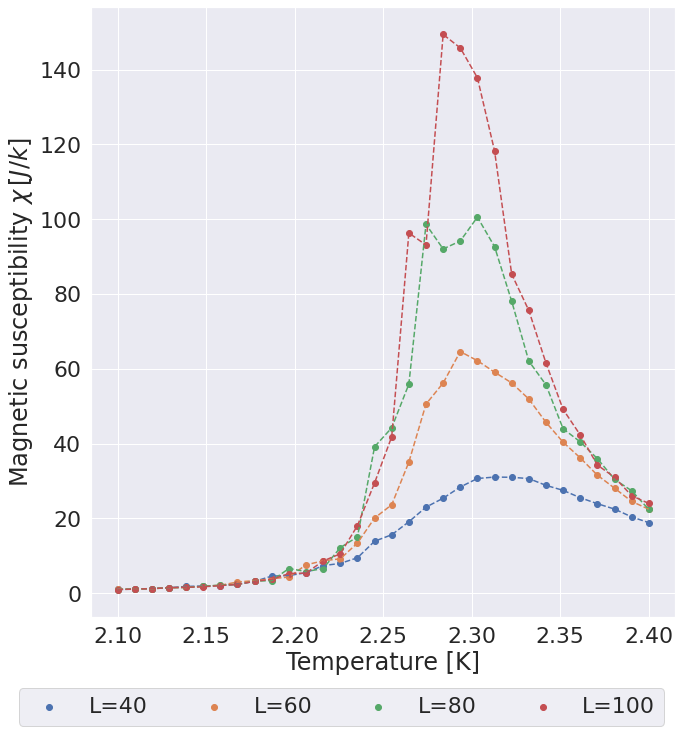

In [41]:
magsusc = [d['X'] for d in datafar]
temps = [d['T'] for d in datafar]
labels = [f"L={int(d.L[0])}" for d in datafar]
xlabel = r'Temperature [K]'
ylabel = r'Magnetic susceptibility $\chi\, [J/k]$'
scatter_plot(temps, magsusc, xlabel, ylabel, labels, savefig=True, filename='phase_chi.pdf')

In [32]:
datafar40 = extract_data([f'../output/40_far/L=40_{i}.bin' for i in range(0, 32)])
datafar60 = extract_data([f'../output/60_far/L=60_{i}.bin' for i in range(0, 32)])
datafar80 = extract_data([f'../output/80_far/L=80_{i}.bin' for i in range(0, 32)])
datafar100 = extract_data([f'../output/100_far/L=100_{i}.bin' for i in range(0, 32)])

datafar = [datafar40, datafar60, datafar80, datafar100]

NameError: name 'data' is not defined

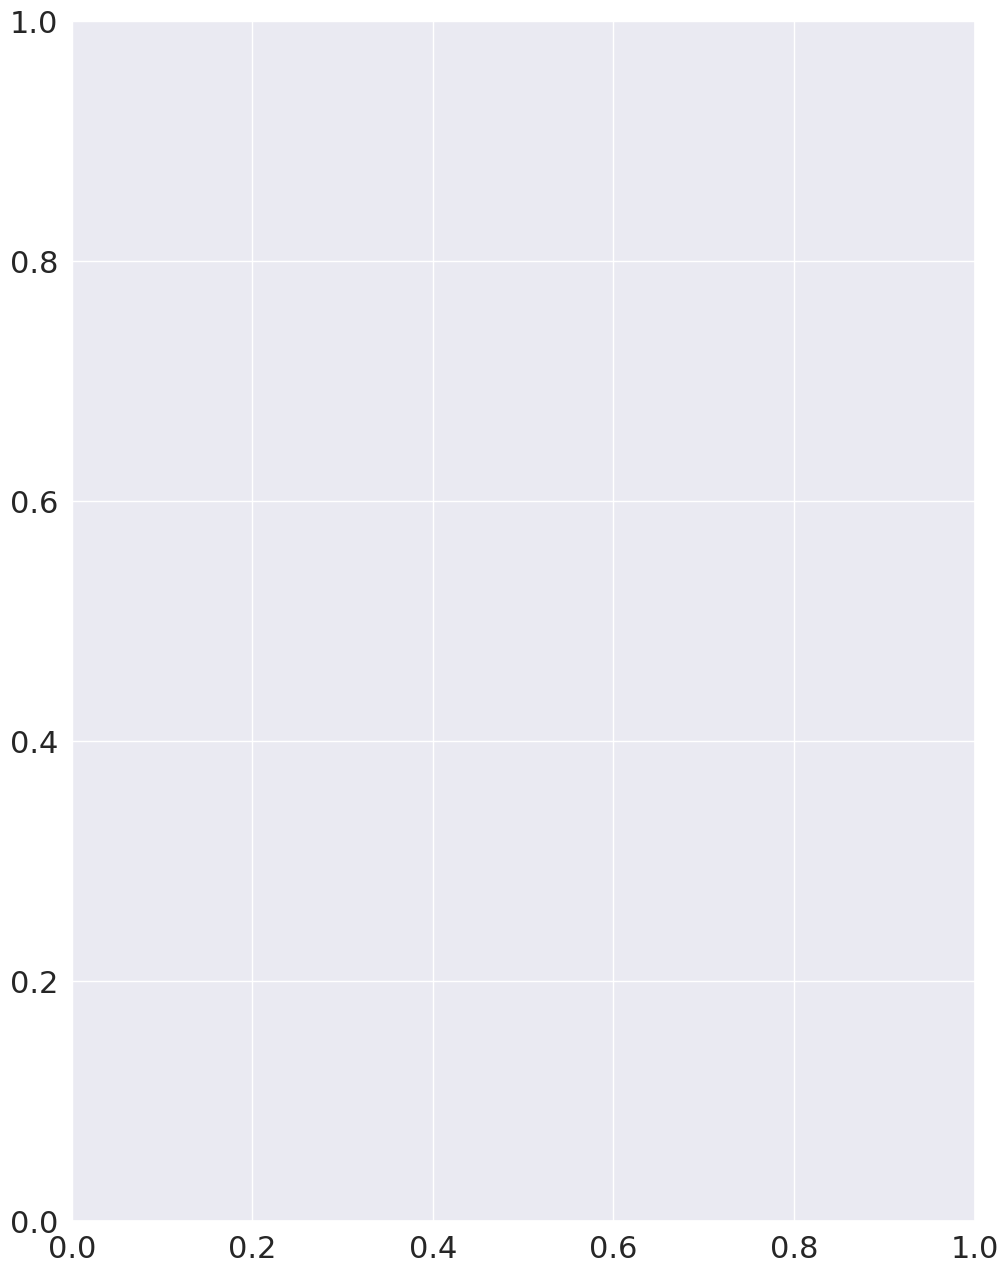

In [148]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

left, bottom = 0.05, 0.1 # for very left and very bottom
thickx, thicky = 0.03, 0.125 # thickness of the left and bottom plots
width, height = 0.75, 0.6 # width and height of main plot
dpx = .025 # space between plots
dpy = .08

# axes for each of the three plots: [left,bottom,width,height]
rect_main = [left+thickx+dpx,bottom+thicky+dpy,width+.153,height] # main plot
rect_left = [left,bottom+thicky+dpy,thickx,height] # left side small plot
rect_bottom = [left+thickx+dpx,bottom,width,thicky] # bottom small plot
nullfmt   = plt.NullFormatter()         # no labels
nullloc   = plt.NullLocator()         

# start with a rectangular figure
plt.figure(1,figsize=(10,20))

axMain = plt.axes(rect_main)

labels = [f"L={int(d.L[0])}" for d in data]
for index, d in enumerate(datafar):
    plt.plot(d['T'], d['M'], linestyle='--')
    plt.scatter(d['T'], d['M'], label=labels[index])

plt.legend(loc = 'lower center', ncol = 5, fancybox = True, 
            bbox_to_anchor = (0.5, -0.12))


axMain.set_xlim(2.08, 2.42)
axMain.set_ylim(0.0, 2.5)
axMain.set_yticks(np.arange(0, 1.2, 0.2))

axins = zoomed_inset_axes(axMain,1.8,loc='upper center') # zoom=6

for index, d in enumerate(data):
    axins.plot(d['T'], d['M'], linestyle='--')
    axins.scatter(d['T'], d['M'], label=labels[index])

# subregion of the original image
x1,x2,y1,y2 = 2.21, 2.36, 0.14, 0.80
axins.set_xlim(x1,x2)
axins.set_ylim(y1,y2)
plt.xticks(visible=True)
plt.yticks(visible=True)
#plt.setp(axins,xticks=[],yticks=[])
# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
mark_inset(axMain, axins, loc1=2, loc2=4, ec="0.5")
plt.savefig('phase_close_comp.pdf')
plt.draw()



LinregressResult(slope=1.5737951807228752, intercept=2.265769327309237, rvalue=0.8829891223974391, pvalue=0.11701087760256088, stderr=0.5915819078735591, intercept_stderr=0.010070054251724631)


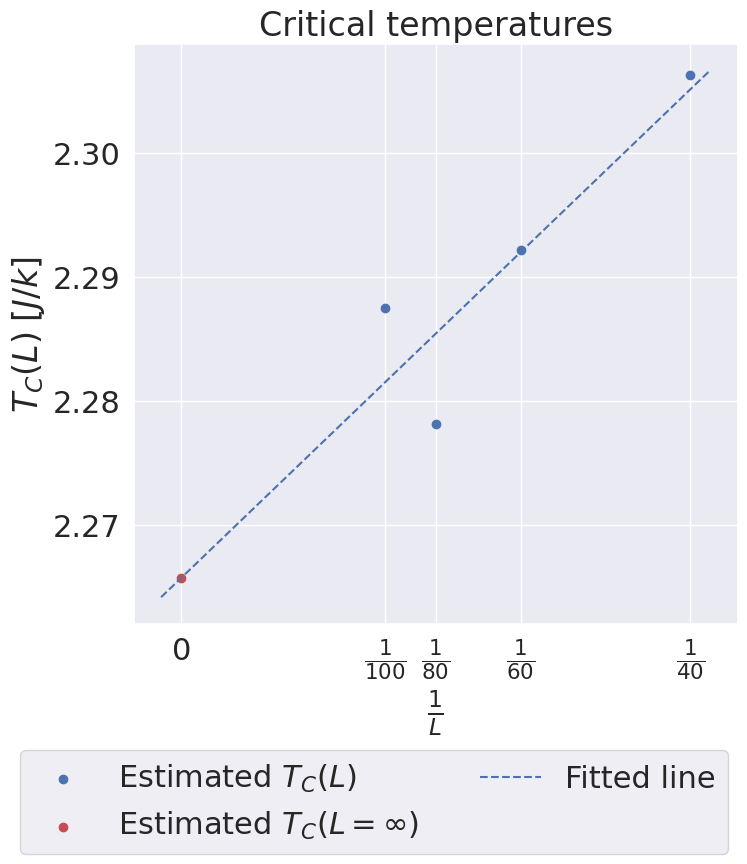

In [3]:
import tikzplotlib
tcSuc = 2.4 - (2.4 - 2.1)/32*np.array([9, 11, 13, 12])
tcHeat = 2.4 - (2.4 - 2.1)/32*np.array([11, 12, 13, 12])
tc = 0.5*(tcHeat + tcSuc)
dtc = np.abs(tc - tcSuc)

L = np.array([40, 60, 80, 100])

from scipy.stats import linregress

line = linregress(1/L, tc)
print(line)
x = np.arange(-0.001, 1/40 + 0.001, 0.001)
fig, axs = plt.subplots(1, 1, figsize = (8, 8))
axs.scatter(1/L, tc, label = r'Estimated $T_C(L)$')
axs.scatter(0, line.intercept, c = 'r', label = r'Estimated $T_C(L = \infty)$')
axs.plot(x, x*line.slope + line.intercept, label = 'Fitted line', linestyle = '--')
axs.set_xlabel(r'$\frac{1}{L}$')
axs.set_ylabel(r'$T_C(L)\; [J/k]$')
lbs = ['0', r'$\frac{1}{100}$', r'$\frac{1}{80}$', r'$\frac{1}{60}$', r'$\frac{1}{40}$']
axs.set_xticks([0, 1/100, 1/80, 1/60, 1/40])
axs.set_xticklabels(labels = lbs)
axs.set_title('Critical temperatures')
lgd = fig.legend(loc = 'lower center', ncol = 2, fancybox = True, 
            bbox_to_anchor = (0.5, -0.12))

fig.tight_layout()
fig.savefig('figures/tc.pdf', bbox_inches = 'tight')
tikzplotlib.save(
            f"tex/tc.tex",
            extra_axis_parameters=[
                "title style={align=center}",
                "xmajorticks=true",
                "ymajorticks=true",
                "mark options={mark size=2.5pt, line width=1.5pt}",
            ],
            strict=True,
        )
plt.show()

In [200]:
print(abs(2.266 - 2.269)/2.269)

0.0013221683561040606


In [196]:
print(line.intercept, line.intercept_stderr)

2.265769327309237 0.010070054251724631


In [204]:
print(tc)

[2.30625   2.2921875 2.278125  2.2875   ]


In [4]:
1/40 + 0.001

0.026000000000000002

In [6]:
line.intercept

2.265769327309237